<a href="https://colab.research.google.com/github/young-hwanlee/stand_alone_deep_learning/blob/main/%239_MLP_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !gist clone https://github.com/young-hwanlee/stand_alone_deep_learning.git

# !pip install -q torch==1.0.0 torchvision
# import torch
# print(torch.__version__)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
# ===== Generate Dataset ===== #
num_data = 2400
x1 = np.random.rand(num_data)*10
x2 = np.random.rand(num_data)*10
e = np.random.normal(0, 0.5, num_data)

X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + 2

In [4]:
np.array([x1, x2]).shape

(2, 2400)

In [5]:
# ===== Split Dataset into Train, Validation, and Test ===== #
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

In [6]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1600, 2) (1600,)
(400, 2) (400,)
(400, 2) (400,)


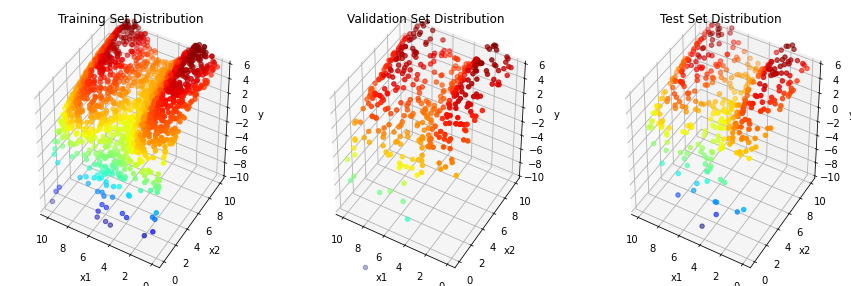

In [7]:
# ===== Visualize Each Dataset ===== #
# ===== Training Set ===== #
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Training Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

# ===== Validation Set ===== #
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

# ===== Test Set ===== #
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

In [8]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)

    def forward(self, x):
        return self.linear(x)

class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.linear2 = nn.Linear(in_features=hidden_dim, out_features=output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [9]:
regression_loss = nn.MSELoss()

In [10]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# ===== Construct Model ===== #
model = MLPModel(input_dim=2, output_dim=1, hidden_dim=200)
print('{} parameters'.format(sum(param.numel() for param in model.parameters() if param.requires_grad)))

801 parameters


In [11]:
# ===== Construct Optimizer ===== #
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

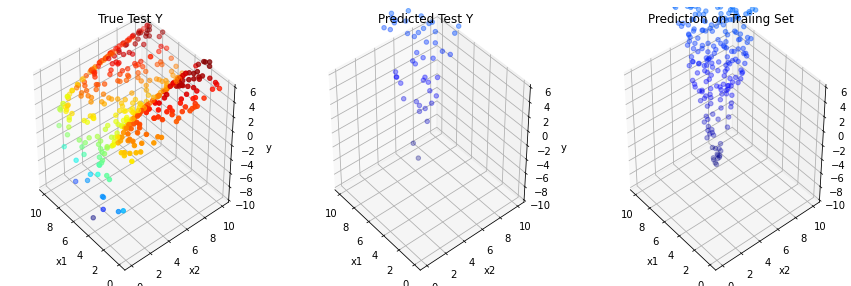

0 tensor(1420.6575, grad_fn=<MseLossBackward0>)


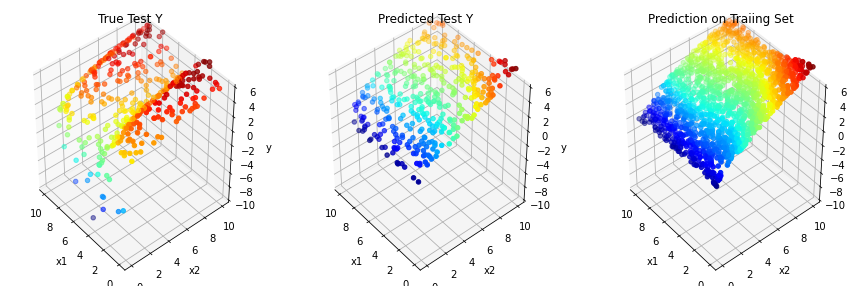

200 tensor(3.2939, grad_fn=<MseLossBackward0>)


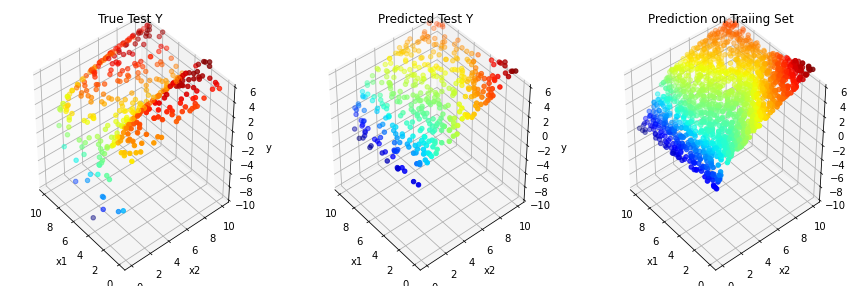

400 tensor(2.7473, grad_fn=<MseLossBackward0>)


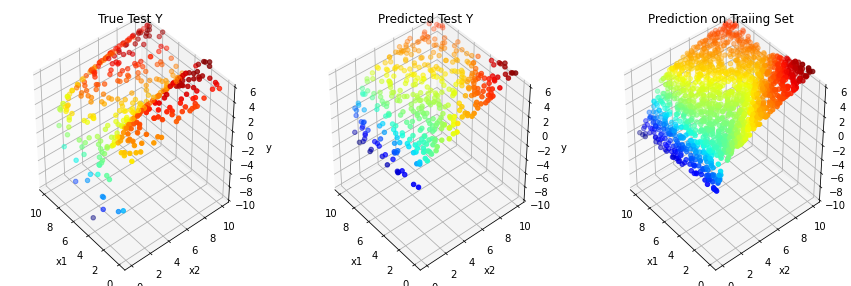

600 tensor(2.4536, grad_fn=<MseLossBackward0>)


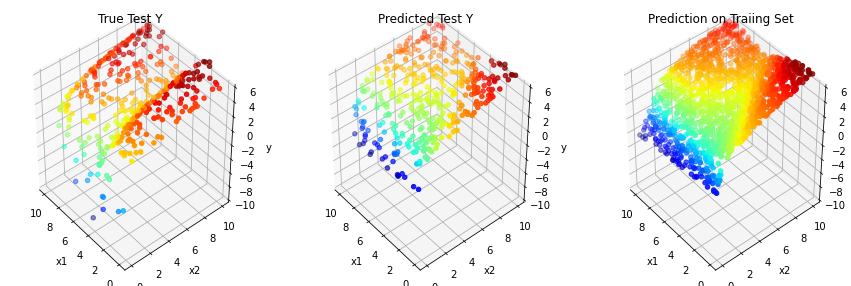

800 tensor(2.2527, grad_fn=<MseLossBackward0>)


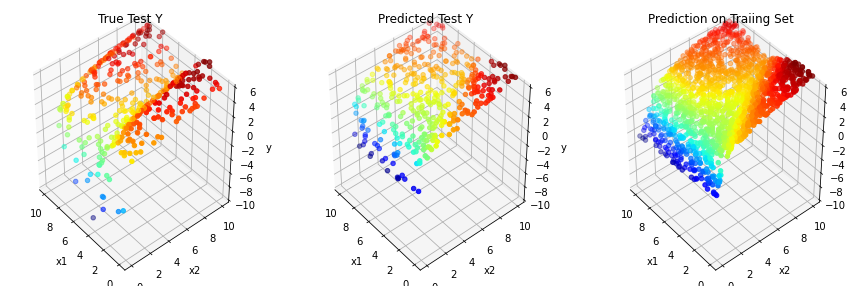

1000 tensor(2.1096, grad_fn=<MseLossBackward0>)


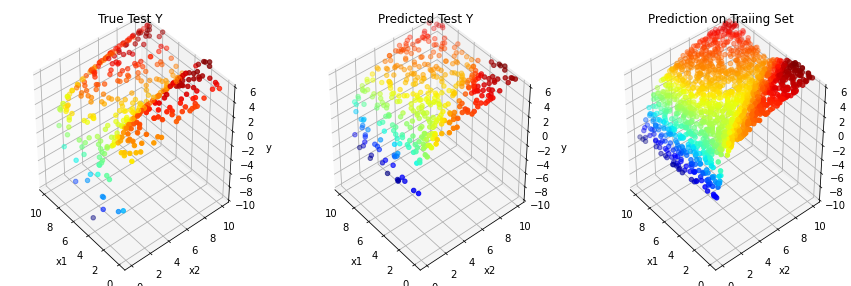

1200 tensor(1.9926, grad_fn=<MseLossBackward0>)


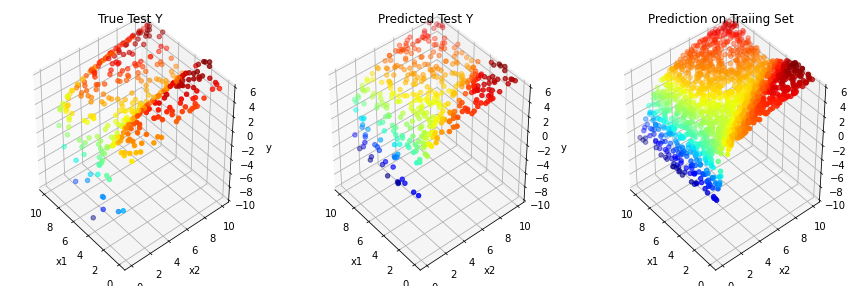

1400 tensor(1.9000, grad_fn=<MseLossBackward0>)


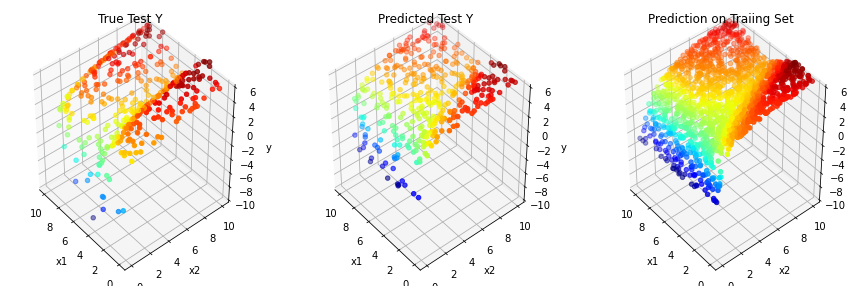

1600 tensor(1.8247, grad_fn=<MseLossBackward0>)


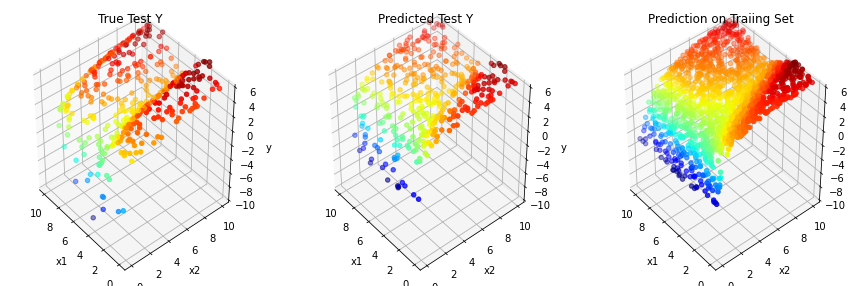

1800 tensor(1.7618, grad_fn=<MseLossBackward0>)


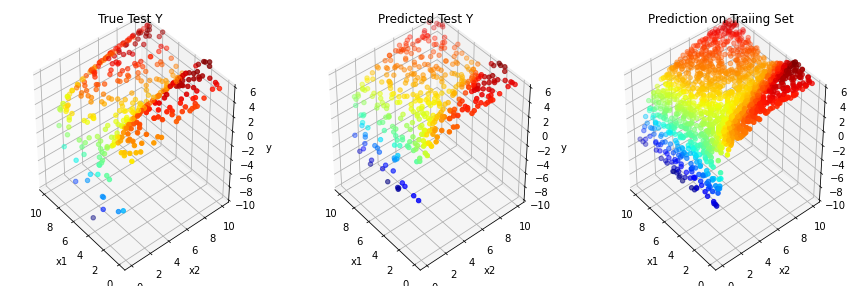

2000 tensor(1.7008, grad_fn=<MseLossBackward0>)


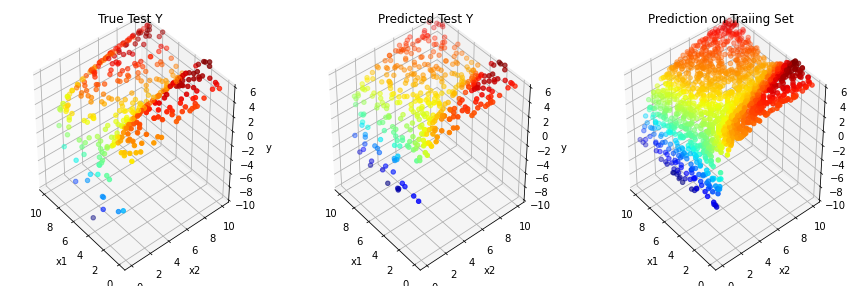

2200 tensor(1.6354, grad_fn=<MseLossBackward0>)


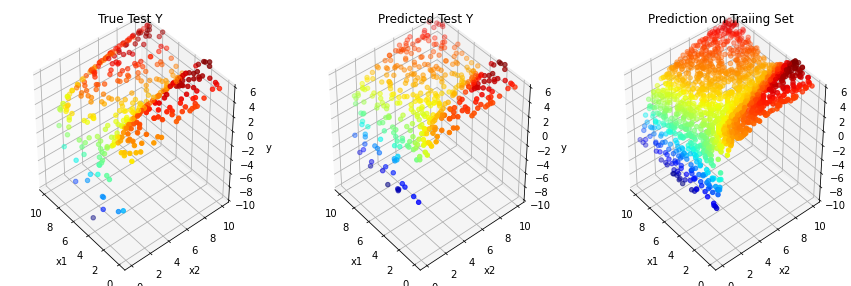

2400 tensor(1.5944, grad_fn=<MseLossBackward0>)


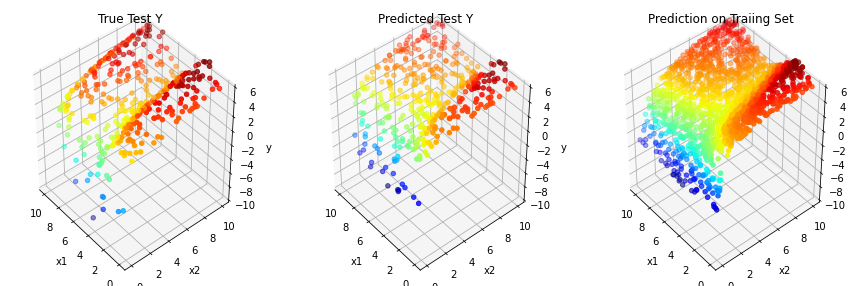

2600 tensor(1.5599, grad_fn=<MseLossBackward0>)


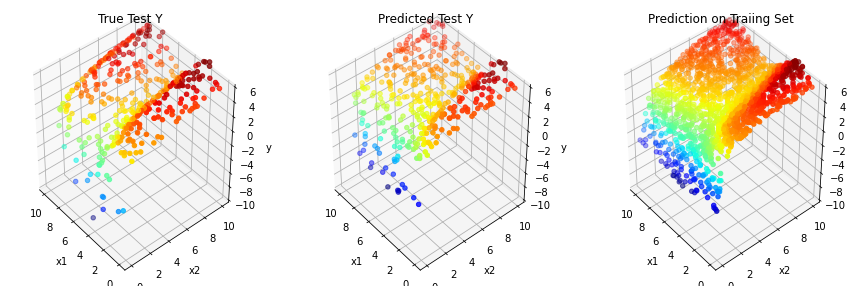

2800 tensor(1.5301, grad_fn=<MseLossBackward0>)


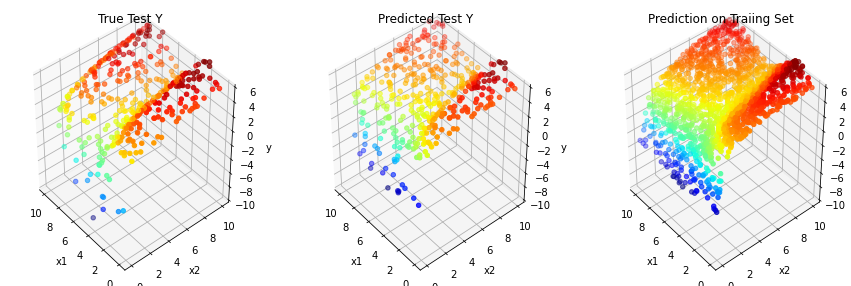

3000 tensor(1.5007, grad_fn=<MseLossBackward0>)


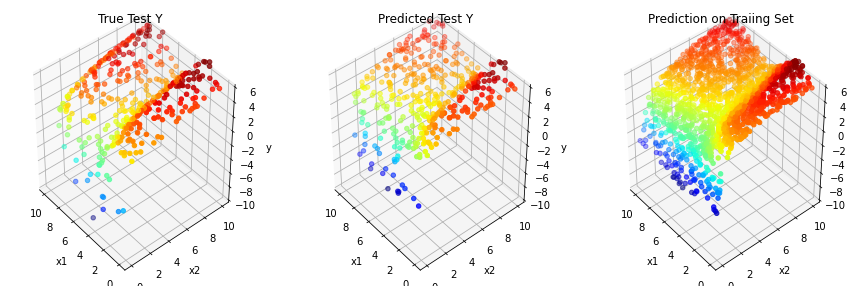

3200 tensor(1.4734, grad_fn=<MseLossBackward0>)


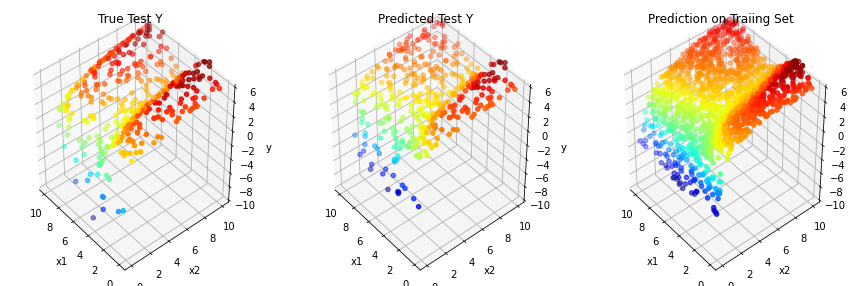

3400 tensor(1.4486, grad_fn=<MseLossBackward0>)


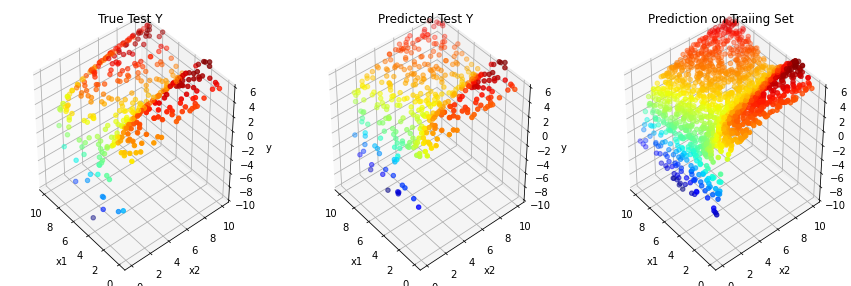

3600 tensor(1.4253, grad_fn=<MseLossBackward0>)


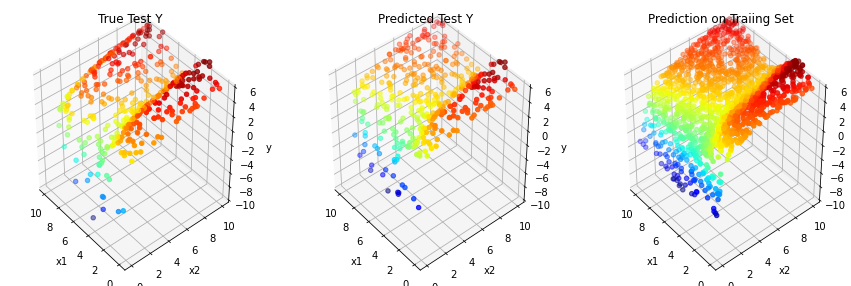

3800 tensor(1.4000, grad_fn=<MseLossBackward0>)


In [12]:
hist_epoch = []
hist_train_loss = []
hist_val_loss = []
hist_mae = []
hist_mae_epoch = []

epoch = 4000
for i in range(epoch):
    # ===== Train ===== #
    model.train()
    optimizer.zero_grad()

    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)

    loss = regression_loss(pred_y.squeeze(), true_y)
    loss.backward()     # compute the gradient
    optimizer.step()
    hist_epoch.append(i)
    # hist_train_loss.append(loss.detach().numpy())         # The detach method means "I don't want gradients."
    hist_train_loss.append(loss.item())

    # ===== Validation ===== #
    model.eval()
    optimizer.zero_grad()

    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)

    loss = regression_loss(pred_y.squeeze(), true_y)
    hist_val_loss.append(loss.item())

    # ===== Test ===== #
    if i % 200 == 0:

        # ===== Calculate MAE ===== #
        model.eval()
        optimizer.zero_grad()

        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        # pred_y = model(input_x).item()        # ValueError: only one element tensors can be converted to Python scalars
        pred_y = model(input_x).detach().numpy()

        mae = mean_absolute_error(true_y, pred_y)
        hist_mae.append(mae)
        hist_mae_epoch.append(i)

        fig = plt.figure(figsize=(15, 5))

        # ===== True Y Scattering ===== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True Test Y')
        ax1.invert_xaxis()

        # ===== Predicted Y Scattering ===== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y, cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted Test Y')
        ax2.invert_xaxis()

        # ===== Just for Visualizing with High Resolution ===== #
        input_x = torch.Tensor(train_X)
        # pred_y = model(input_x).item()        # ValueError: only one element tensors can be converted to Python scalars
        pred_y = model(input_x).detach().numpy() 

        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y, cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        # ax3.set_title('Predicted Train Y')
        ax3.set_title('Prediction on Traiing Set')
        ax3.invert_xaxis()

        plt.show()
        print(i, loss)

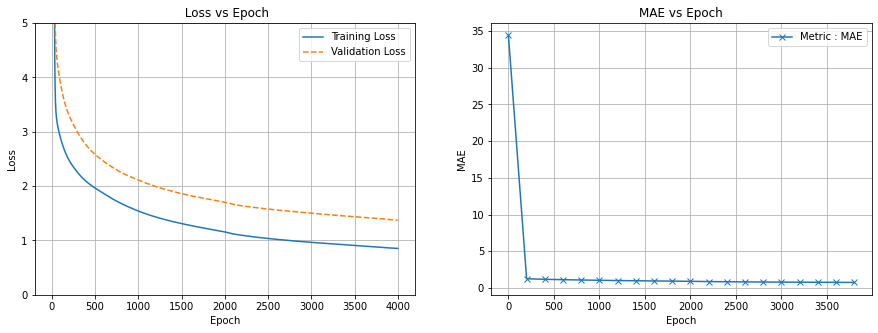

In [13]:
fig = plt.figure(figsize=(15, 5))

# ===== Loss ===== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist_epoch, hist_train_loss, label='Training Loss')
ax1.plot(hist_epoch, hist_val_loss, '--', label='Validation Loss')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title(' Loss vs Epoch')

# ===== Metric : MAE ===== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist_mae_epoch, hist_mae, marker='x', label='Metric : MAE')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()
ax2.set_title('MAE vs Epoch')

plt.show()